### Importing Essential Libraries and Modules:

To get started with our Data Science project, first we need to import few essential data science and machine learning libraries and modules we'll be needing for our analysis. I'll go through each of the one, and will explain their functionality one by one.

So, lets get started

* Pandas: for Exploratory data analysis
* Seaborn : for the visualization of the data plots
* matplotlib.pyplot: Here, we are importing the class pyplot, off of matplotlib library, in order to visualize our data set
* Numpy: Numerical python, is for the Arithemtic operations, like multiplication of matrices and stuff
* Sklearn.decomposition.PCA: For extracting the features off of our data set
* Sklearn.model_selection.train_test_split: for splitting our data set in training set, and testing set
* Sklearn.linear_model.LogisticRegression: for the classification of our class_label dependent feature
* Sklearn.metrics.confusion_matrix: for testing the accuracy of predictions
* Sklearn.metrics.classification_report: for testing the accuracy of predictions
* Sklearn.svm.SVC: Machine learning algorithm for the classification of our data set
* Sklearn.neighbors.KNeighborsClassifier: Alogorithm for classification
* Sklearn.metrics.accuracy_score: for measuring the accuracy parameter of our classification
* CSV module: for transforming our list of ranked_correlations into a CSV file

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
import csv 

%matplotlib inline

### Importing Data Set:

Now let's go ahead and import our data set, on which we're going to be performing our analysis.

In [2]:
df = pd.read_csv('data.csv')

### Exploratory Data Analysis:

We need to make an Exploratory Data Analysis, using Pandas primarily, in order to be aware of some hides and outs of our data set. We first make our statistical analysis, to have a better idea of the statistics of our data set, since most of our data set column's are numerical values. Mainly the statistics features involve the following things:

* Number of counts
* mean value
* std value
* Max value
* Min value
* Min value
* 75% and 25% values

Then we'll try to find out if there is any Null values in our data set. If we found any, we'll apply some operations to fix that, because we can't afford to have Null values inside our data set for better accuracy measures

Also we need to find out the counts of every distinct entry in our target class_label, for this we'll create a logic
to find out the counts for each distinct values and check out what proportion of the values of our dependent feature already exists. Finally, we'll go ahead and chop off any unwanted feature we don't need for our algorithms to feed in. This mostly happens when we have string value columns in our data set.

So, let's do it



In [3]:
df.describe()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.000000,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,1.001252,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,-1.000000,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,-1.000000,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.000000,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,1.000000,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,1.000000,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


In [4]:
df.isnull().head()

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
counts = {}

for entry in df['class_label']:
    if entry in counts:
        counts[entry] += 1
    else:
        counts[entry] = 1
        
counts

{1.0: 200, -1.0: 200}

In [6]:
df.drop('sample index', axis = 1, inplace = True)

### Finding Correlations of The Features:

Here's an important part of our analysis, i.e Features Correlations. Normally what happens is, in our data set, there is whole lot of featuer values, and we need to figure out the correlations of of those feature values in order to have an estimate of our data set. There comes features correlation technique, in which we tend to select only those features and columns that have greater impact on our dependent variable. Let's dig a bit deeper inside our data set and try to find out some featuers that're gonna help us come up with better accuracy measures. And finally we're gonna report back those features values in descending order, i.e from highest dependency to the lowest.

Finally in order to build a data frame of Sensor names and their correlations with "class_label", we have to apply some logics organize our data and create a data frame off of that organized data. So let me quicky explain what going on down there.

* First I'll create a list of correlations, and sorted out the list in descending order
* Then I'll create the correlations dictionary, from which I'll be able to create an organized dataframe
* Finally we'll sort this dictionary out, and off of that we'll build our data frame, that'll report back the feaures as well as their correlations with our "class_label"

So, let's go ahead and do that..


In [7]:
corr_list = []

for index,column in enumerate(df[:]):
    corr = df['class_label'].corr(df[column])
    print('Feature {} : Correlation {}'.format(column, corr))
    corr_list.append(corr)

Feature class_label : Correlation 1.0
Feature sensor0 : Correlation 0.5432950594605451
Feature sensor1 : Correlation -0.25200734226009575
Feature sensor2 : Correlation 0.03877543484999283
Feature sensor3 : Correlation 0.43363644436420123
Feature sensor4 : Correlation 0.6076228345496761
Feature sensor5 : Correlation 0.22414719421524462
Feature sensor6 : Correlation -0.0074144251226751475
Feature sensor7 : Correlation 0.1756121918018469
Feature sensor8 : Correlation 0.6606179222510381
Feature sensor9 : Correlation 0.09490706714608717


In [8]:
ranked_correlations = sorted(corr_list, reverse = True)
print(ranked_correlations) # Check Point!

[1.0, 0.6606179222510381, 0.6076228345496761, 0.5432950594605451, 0.43363644436420123, 0.22414719421524462, 0.1756121918018469, 0.09490706714608717, 0.03877543484999283, -0.0074144251226751475, -0.25200734226009575]


In [9]:
corr_dict = {}

for column in df:
    corr = df['class_label'].corr(df[column])
    corr_dict[column] = corr
    
corr_dict

{'class_label': 1.0,
 'sensor0': 0.5432950594605451,
 'sensor1': -0.25200734226009575,
 'sensor2': 0.03877543484999283,
 'sensor3': 0.43363644436420123,
 'sensor4': 0.6076228345496761,
 'sensor5': 0.22414719421524462,
 'sensor6': -0.0074144251226751475,
 'sensor7': 0.1756121918018469,
 'sensor8': 0.6606179222510381,
 'sensor9': 0.09490706714608717}

In [10]:
ranked_corr_features = sorted(corr_dict.items(), key = lambda t: t[1], reverse = True)

In [11]:
ranked_corr_features

[('class_label', 1.0),
 ('sensor8', 0.6606179222510381),
 ('sensor4', 0.6076228345496761),
 ('sensor0', 0.5432950594605451),
 ('sensor3', 0.43363644436420123),
 ('sensor5', 0.22414719421524462),
 ('sensor7', 0.1756121918018469),
 ('sensor9', 0.09490706714608717),
 ('sensor2', 0.03877543484999283),
 ('sensor6', -0.0074144251226751475),
 ('sensor1', -0.25200734226009575)]

In [12]:
cols = []
values = []
i = 0
for item in ranked_corr_features:
    cols.append(item[0])
    values.append(item[1])

In [13]:
ranked_corr_dict = dict(zip(cols,values))

In [14]:
ranked_corr_dict

{'class_label': 1.0,
 'sensor8': 0.6606179222510381,
 'sensor4': 0.6076228345496761,
 'sensor0': 0.5432950594605451,
 'sensor3': 0.43363644436420123,
 'sensor5': 0.22414719421524462,
 'sensor7': 0.1756121918018469,
 'sensor9': 0.09490706714608717,
 'sensor2': 0.03877543484999283,
 'sensor6': -0.0074144251226751475,
 'sensor1': -0.25200734226009575}

In [15]:
ranked_corr_df = pd.DataFrame(ranked_corr_dict, index = [0])

In [16]:
ranked_corr_df # Check Point

,class_label,sensor8,sensor4,sensor0,sensor3,sensor5,sensor7,sensor9,sensor2,sensor6,sensor1
0,1.0,0.660618,0.607623,0.543295,0.433636,0.224147,0.175612,0.094907,0.038775,-0.007414,-0.252007


### Data Visualization:

Now that we have successfully found out the best possible correlations list. Let's move towards another important aspect of our data analysis, which is Data Visualizations. Data visualization, helps analyse the data, where the data set is very large and we don't have any chance to explore the data just by looking at feature values or just having a statistical knowledge of the feature values. We need to analyse the patterns and sequence through data visualizations and for this offcourse we'll be using Matpoltlib and Seaborns. We're gonna analyse our data set primarily with the following Matplotlib and Seaborn tools:

* Heapmaps
* Univariate plotting
* Bivariate plotting

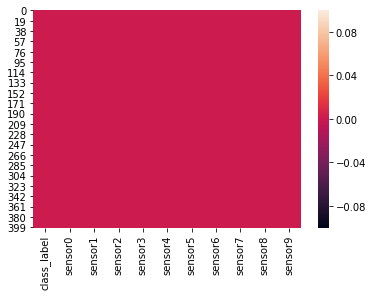

In [17]:
sns.heatmap(data = df.isnull())

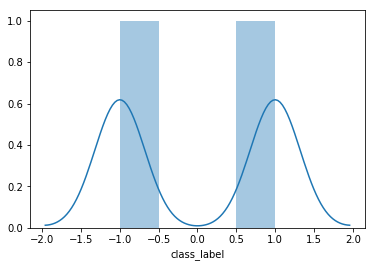

In [18]:
sns.distplot(df['class_label'])

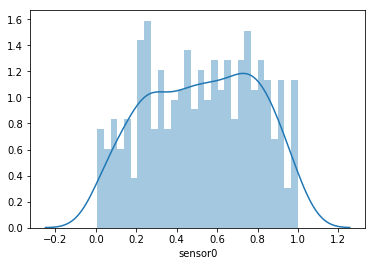

In [19]:
sns.distplot(df['sensor0'], kde = True, bins = 30)

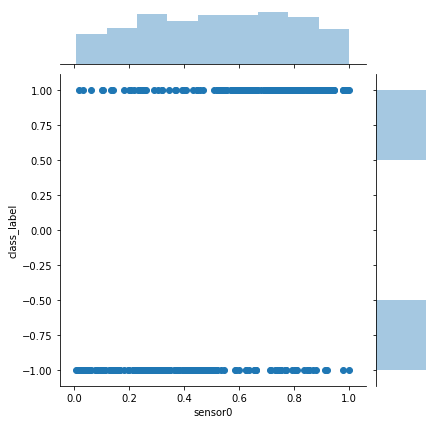

In [20]:
sns.jointplot(x = 'sensor0', y = 'class_label', data = df)

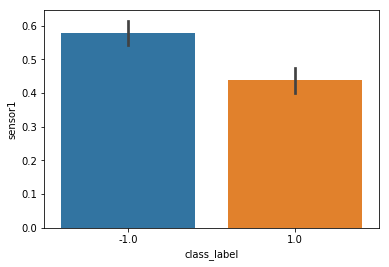

In [21]:
sns.barplot(x = 'class_label', y = 'sensor1', data = df)

### Data Normalization and Features Scaling:

Now let's go ahead and normalize our data set, but first let's have some analysis on few things:

Looking at the heatmap, it's clear that the data has already been normalized, becauses the values ranging between 0 through 1. 

So technically we don't need to Normalize the data set, we'll eventually after testing the performance of our classifiers, if the accuracy drops, try some extra tricks to come up with better accuracy. In this way we'll also see what impact does Normalization has on our classification

Lets call describe() method off of our data set, and see what kind of Normalized statistical features we have!

In [22]:
df.describe()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.000000,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,1.001252,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,-1.000000,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,-1.000000,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.000000,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,1.000000,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,1.000000,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


### Features Engineerig with PCA:

Here's an important part of our analysis, i.e Features Extractions. Normally what happens is, in our data set, there is whole lot of featuer values, and we need to figure out what values are best suitable for our algorithm in order to have the best accuracy measures?? There comes features extraction technique, in which we tend to select only those features and columns that have greater impact on our dependent variable. Let's dig a bit deeper inside our data set and try to find out some featuers that're gonna help us come up with better accuracy measures.

Ok. Let's go ahead and find out the features that are going to impact the most on our 'class_label'. But here's the thing, we need to manually chooose a value of n_components in order to select the number of features, and it's automatically going to select those top 'X' no. of features that have major impact on our dependent feature. And the question is how we are going to select those n_components on which our dependent feature will be predicted. One way is to embedd the values in following formula and try to find out the number of n_components. And the formula is 2 ** (independent features) = No of observations in our data set. 

Following this formula we have n_components = 9. We'll be computing for n=9 and see what results we come up with, if we thought that our classifier is not predicting well, we can always go ahead and drop the features by the help of exploratory data analysis or by hit and trail. But keep in mind dropping features is not the best idea always!


In [23]:
pca = PCA(n_components = 9)

In [24]:
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
x_pca = pca.transform(df)

In [26]:
x_pca.shape

(400, 9)

In [27]:
type(x_pca)

numpy.ndarray

In [28]:
df_pca = pd.DataFrame(x_pca)

In [29]:
df_pca.head()

,0,1,2,3,4,5,6,7,8
0,-1.044867,-0.217018,-0.480744,0.027423,0.022602,0.060396,0.240332,0.242750,0.197254
1,-0.898673,0.300780,0.248800,0.192346,0.167744,-0.614118,0.153778,0.233081,0.232828
2,-1.072623,-0.501007,-0.041660,-0.292509,-0.233253,-0.357398,-0.014586,0.218153,0.037947
3,-1.122398,0.475722,0.178598,-0.297890,-0.076354,-0.308010,0.027396,-0.048506,0.069739
4,-1.099792,-0.003412,0.149508,-0.090173,-0.591424,-0.094310,0.182457,-0.225297,0.069493


###  Logistic Regression:

Now that we have done all the mendatory processes on our data in order to apply the Machine learning algorithms, we are ready to go for applying No. of algorithms off of our pre-processed data, and compare the results of each.

First let's try to classify the results with LogisticRegression. Binary LogisticRegression is used where the classes are binary, or means we have only two classes to predict. And there's whole lot of variations in that as well, but here since the thresh hold is average value and we are gonna predict the classes off of that threshold value i.e 0 we'll stick to only binary classification. In short LogisticRegression is used when the dependent variable(target) is categorical. For instance:

* To predict whether an email is spam (1) or (0)
* Whether the tumor is malignant (1) or not (0)

So, let's go ahead and implement LogisticRegression in order to predict our target classes!

In [30]:
X0 = df.drop('class_label', axis = 1)
y0 = df['class_label']

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.3, random_state = 101)

log0_model = LogisticRegression()

log0_model.fit(X0_train,y0_train)

my_assump_predictions = log0_model.predict(X0_test)

print(confusion_matrix(y0_test, my_assump_predictions))
print('\n')
print('classification report:')
print('\n')
print(classification_report(y0_test, my_assump_predictions))
print('Accuracy: {0:.3f}'.format(accuracy_score(y0_test, my_assump_predictions) * 100))


[[50  5]
 [ 6 59]]


classification report:


              precision    recall  f1-score   support

        -1.0       0.89      0.91      0.90        55
         1.0       0.92      0.91      0.91        65

   micro avg       0.91      0.91      0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120

Accuracy: 90.833


/home/umairshah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Look it has already come up with an excellent accuracy score of almost 91%, which means our classifier is predicting the correct values upto 91% which is truly amazing. Lets go ahead and try out some more algorithms to see if we can imporve our accuracy a bit more. So lets do it

### Support Vector Machines:

Before implementing Support Vector Machines, let's briefly discuss how SVM actually works. Suppose we are given tow sets of sample classes, in case above, and our job is to draw a line that separates them the best. And by the "best" I mean to separate them in such a way that the decision boundary or the line that separates the two classes, creates the widest road (margin) between the two sets of groups. In case of Linear seperable classes, the Kernel version used is Linear kernal.

But what if we want to separate the 3D classes. Well, for that the decision boundary is called the Hyperplane, which is the type of plane SVM draws by tranforming the data set into 3D and predicts target classes off of that. Here we'll only stick to Linear kernel we are using, in SVM.

Lets go ahead and implement the SVM algorithm and see what sort of results we get!

In [31]:
svm = SVC()

X1 = df.drop('class_label', axis = 1)
y1 = df['class_label']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 101)

svm.fit(X1_train, y1_train)

predictions_1 = svm.predict(X1_test)

print(confusion_matrix(y1_test, predictions_1))
print('\n')
print(classification_report(y1_test, predictions_1))
print('\n')
print('Accuracy: {0:.3f}'.format(accuracy_score(y1_test, predictions_1) * 100))

[[51  4]
 [ 7 58]]


              precision    recall  f1-score   support

        -1.0       0.88      0.93      0.90        55
         1.0       0.94      0.89      0.91        65

   micro avg       0.91      0.91      0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



Accuracy: 90.833


/home/umairshah/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Well surprisengly, it has come up with almost the exact accuracy score as Logistic Regression, but if we pay attention to confusion matrix, we can see the precision and recall values differ for each of the algorithm, which shows the different approach of each of them. Since the Logistic Regression is a probabilistic approch therefore it has it's own ratio of True positives/True Positives + Faslse Positives and so does SVM's

### Classification with Dimetionality Reduction:

Principle components analysis and dimentionality reduction is applied for data set having atleast more than 10 dimentions, prior to apply any classification algorithm. But here, since our analysis is based on classifying and assesing the performance of algorithms alone, we need to apply dimentionality reduction on a specific type of data set.

But, before we apply PCA, let me quickly tell you some of it's advantages:

* time efficiency
* Removal of dependency of multiple independent features improve the interpretation of the parameters of Machine learning model
* It becomes easier to visualize the data when reduced to a very low dimensions

Now lets try to train our model, with feature Engineered data set we made earlier.
We reduced the dimentionality of our features, and omitted out the features that don't really impact our
target class. Let's go ahead and grab that data set

In [32]:
x_pca.shape

(400, 9)

In [33]:
X2 = df_pca
y2 = df['class_label']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 101)

log_model = LogisticRegression()

log_model.fit(X2,y2)

predictions_2 = log_model.predict(X2_test)

print(confusion_matrix(y2_test, predictions_2))
print('\n')
print(classification_report(y2_test, predictions_2))
print('Accuracy: {0:.3f} '.format(accuracy_score(y2_test, predictions_2) * 100))

[[55  0]
 [ 0 65]]


              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        65

   micro avg       1.00      1.00      1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Accuracy: 100.000 


/home/umairshah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 3. K-Nearest Neighbors:

KNN Machine learning algorithm is widely used in classification. It's purpose is to use a data set in which data points are separated into multiple classes to predict the classification of a new sample point.

Let's discuss some of it's Pros and Cons:

##### Pros:

* It's simple to use
* High accuracy
* Can be used on variety of data sets.
* No need to be aware of parameters of a particular observation

##### Cons:

* A little computationally expensive
* Stores the training data
* Data needs to be normalized
* Sensitive to irrelevant features and the scale of the data

### My Own Assumption:

Well, what I think would be the best option is to go for the KNN classifier. Now before I explain why I think KNN could out perform lets quickly have a glance at our data set.

If we pay attention, we can see that the independent columns are not correlated with one another, but they do relate somehow with our target class. Which means that, we do not necceserly have to go for features reduction, unless we see that there is some major correlations between independent features. So there is no point in extracting the features. Also as per Professor Andrew NG, "do not go for features reduction unless you don't have any option left", sort of exactly fits here.

secondly, the data set we have is non-parametric. Let me tell you what non-parametric means. You see the independent values are not given any titles, that means it is on the spot to use KNN algorithm to predict the values here, because this is what KNN does, You give the data set to the classifier, telling it look we don't exaclty know what are the parameters of this particular observation, we only know that it belongs to a certain group, now it's your job to find out the patterns which neccesserly contribute it to fall in a certain group. So that's why I would first apply KNN on the given data set, and hopefully under the light of above analysis, we are gonna come up with some interesting results.

READY? 

Let's do it..

In [34]:
X3 = df
y3 = df['class_label']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 101)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X3_train, y3_train)

predictions_3 = knn.predict(X3_test)

print(confusion_matrix(y3_test, predictions_3))
print('classification report:')
print(classification_report(y3_test, predictions_3))
print('Accuracy: {0:.3f}'.format(accuracy_score(y3_test, predictions_3) * 100))

[[55  0]
 [ 0 65]]
classification report:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        65

   micro avg       1.00      1.00      1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Accuracy: 100.000


And there you go, it has done amazingly awesome classification with accuracy upto 100% plus we have all the features in our data set and we didn't reduce any of them.

### Pickle the Model:

Now that we are done with implementing variety of algorithms and making analysis of our models, it's time to Pickle the models.

So before, I go ahead and pickle our models, let me briefly explain what Pickle module does.

When we train our model, on a certain data set, we need to store this trained model, in some sort of character stream, so that next time when we want to predict the classes off of our model, we don't have to train the model again and again. This is done through built-in Python module 'Pickle'. Let me show you, what methods we call off of this pickle module in order to save the data, and then reload it, each time we need to predict values off of our model, which has been trained only once.

* pickle.dump() >> dumps our trained model, in a special character stream
* pickle.load() >> reloads the model, so that we can use it just like our trained model, without bothering about training it again.

First we'll pickle our model, and then we'll reload the model, call few methods off of it, just to make sure if we have correctly pickled the model.

So, pretty much has been discussed about Pickle, let's go ahead and see this in action!

In [35]:
import pickle

In [36]:
with open('model1_LogReg', 'wb') as f1:
    pickle.dump(log0_model, f1)

In [37]:
with open('model1_LogReg', 'rb') as f1:
    model1 = pickle.load(f1)

In [38]:
model1.predict(X0_test)

array([ 1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        1., -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,
        1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,
        1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,
        1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,
        1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,
       -1.,  1., -1.])

In [39]:
with open('model2_SVM', 'wb') as f2:
    pickle.dump(svm, f2)

In [40]:
with open('model2_SVM', 'rb') as f2:
    model2 = pickle.load(f2)

In [41]:
model2.predict(X1_test)

array([ 1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        1., -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,
        1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,
       -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,
        1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,
       -1.,  1., -1.])

In [42]:
with open('model3_PCA', 'wb') as f3:
    pickle.dump(log_model, f3)

In [43]:
with open('model3_PCA', 'rb') as f3:
    model3 = pickle.load(f3)

In [44]:
model3.predict(X2_test)

array([ 1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,
        1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
        1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,
        1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,
       -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
       -1.,  1., -1.])

In [45]:
with open('model4_KNN', 'wb') as f4:
    pickle.dump(knn, f4)

In [46]:
with open('model4_KNN', 'rb') as f4:
    model4 = pickle.load(f4)

In [47]:
model4.predict(X3_test)

array([ 1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,
        1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
        1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,
        1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,
       -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
       -1.,  1., -1.])

### Creating CSV:

Finally, let's go ahead and create a CSV file off of our dataframe, which contains the correlations in descending order of different sensor values, with our dependent variable i.e 'class_label'

First I'll show you, how the Dataframe looks like, and then we'll go ahead and create a CSV file off of that, and after that we'll test the CSV file we made.

So let's give it a shot

In [48]:
ranked_corr_df

,class_label,sensor8,sensor4,sensor0,sensor3,sensor5,sensor7,sensor9,sensor2,sensor6,sensor1
0,1.0,0.660618,0.607623,0.543295,0.433636,0.224147,0.175612,0.094907,0.038775,-0.007414,-0.252007


In [49]:
with open('ranked_corr_df', 'w') as file:
    
    thewriter = csv.writer(file)
    thewriter.writerow(ranked_corr_df)
    thewriter.writerow(ranked_correlations)

In [50]:
csv_test = pd.read_csv('ranked_corr_df')

In [51]:
csv_test

,class_label,sensor8,sensor4,sensor0,sensor3,sensor5,sensor7,sensor9,sensor2,sensor6,sensor1
0,1.0,0.660618,0.607623,0.543295,0.433636,0.224147,0.175612,0.094907,0.038775,-0.007414,-0.252007
